# Week 3, Lab \#2

*January 31, 2024*

**Objectives:**

- Gain more sophistication with Python as a programming language
- Practice writing conditional expressions in Python
- Filter and aggregate spatially explicit data

For this lab, we'll be working with data on **Net Primary Productivity (NPP).** Plants (primary producers) take up carbon dioxide from the atmosphere and use it create carbon compounds they store for energy; this is called *photosynthesis.* But plants also have to spend that energy to sustain their metabolism; this requires them to burn carbon compounds, so some of that stored carbon is returned to the atmosphere. **NPP is the amount of carbon (C) stored in plant tissues after accounting for the C they lose in respiration.**

    NPP = [C fixed in photosynthesis] - [C lost in plant respiration]
    
NPP is often measured in grams of carbon (C) per square meter per unit time. It's most convenient to estimate NPP on annual time scales, so the data here are in grams of carbon (C) per square meter (m$^{-2}$) per year (g C m$^{-2}$ year$^{-1}$).

**We'll be working with a global dataset on GPP and NPP:**

- [Multiple-biome NPP estimates from the Global Primary Production Data Initiative (GPPDI)](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=617)

Some of the abbreviations used in this dataset include:

**Biome types:**

- C3 and C4 refer to two different kinds of photosynthesis; most plants are C3 but C4 plants include important agricultural varieties like corn.
- ENL refers to Evergreen Needleleaf ("coniferous" trees)
- DNL refers to Deciduous Needleleaf (like a Western Larch, it loses its needles in the fall)
- EBL refers to Evergreen Broadleaf, like broad-leaved tropical trees
- DBL refers to Deciduous Broadleaf, like an Oak or Maple, which lose leaves in the fall

# Introduction

How do rates of NPP (i.e., the amount of C fixed in plant tissues per unit area per unit time) vary between different biomes?

Let's take a look at the data.

In [3]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [1]:
import pandas as pd

pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/GPPDI_ClassA_NPP_162_R2.csv")

,SITE_ID,LAT_DD,LONG_DD,LAT_OLD,LONG_OLD,ELEV_GIV,SOURCE,COUNTRY,BIOMENEW,VEG_TYPE,SPECIES,TEMP_ANN,PREC_ANN,ANPP_C,BNPP_C,TNPP_C,REFERENC,YEAR_REF,MEAS_ID
0,4,-27.75,152.45,-27.75,152.45,-999,Day,Australia,grassland / C4 tropical,grassland,Heteropogon sp.,18.5,917,165,99,264,NaN,NaN,1
1,5,-27.03,152.02,-27.03,152.02,-999,Day,Australia,grassland / C4 tropical,grassland,Heteropogon sp.,17.5,848,106,70,175,NaN,NaN,2
2,6,-26.76,148.82,-26.76,148.82,-999,Day,Australia,grassland / C4 tropical,grassland,Cenchrus ciliaris,20.4,541,68,41,110,NaN,NaN,4
3,6,-26.76,148.82,-26.76,148.82,-999,Day,Australia,grassland / C4 tropical,grassland,Aristida sp.,20.4,541,106,58,164,NaN,NaN,3
4,7,-26.58,148.77,-26.58,148.77,-999,Day,Australia,grassland / C4 tropical,grassland,Thyridolepis mitchell,20.5,553,105,57,161,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Evergreen,Picea glauca,-3.5,269,310,71,431,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,171
158,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Populus balsami,-3.5,269,415,197,612,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,169
159,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Betula papyrifera,-3.5,269,540,124,669,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,168
160,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Alnus populus,-3.5,269,635,160,795,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,167


**There are three different columns that describe NPP:**

- `ANPP_C` refers to Above-ground NPP; this is the portion of NPP (carbon) that is stored in the parts of plants above ground, like leaves, stems, and tree trunks.
- `BNPP_C` refers to Below-ground NPP; this is the portion of NPP (carbon) that is stored in below-ground plant parts, specifically the roots.
- `TNPP_C` is the sum of `ANPP_C` and `BNPP_C`.

In [3]:
import pandas as pd
# Load the data with just a subset of the columns
data = pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/GPPDI_ClassA_NPP_162_R2.csv",
                  usecols = ["SITE_ID", "LAT_DD", "LONG_DD", "BIOMENEW", "TNPP_C"])

In [6]:
data.head()

,SITE_ID,LAT_DD,LONG_DD,BIOMENEW,TNPP_C
0,4,-27.75,152.45,grassland / C4 tropical,264
1,5,-27.03,152.02,grassland / C4 tropical,175
2,6,-26.76,148.82,grassland / C4 tropical,110
3,6,-26.76,148.82,grassland / C4 tropical,164
4,7,-26.58,148.77,grassland / C4 tropical,161


In [4]:
type(data)

pandas.core.frame.DataFrame

You haven't seen this type of object in Python before, but a pandas "DataFrame" is a data structure for holding tabular (row-column) data.

In [5]:
data.columns

Index(['SITE_ID', 'LAT_DD', 'LONG_DD', 'BIOMENEW', 'TNPP_C'], dtype='object')

We can iterate through the table row-by-row if we convert the DataFrame to a NumPy array:

In [7]:
for row in data.to_numpy():
    print(row)

[4 -27.75 152.45 'grassland / C4 tropical' 264]
[5 -27.03 152.02 'grassland / C4 tropical' 175]
[6 -26.76 148.82 'grassland / C4 tropical' 110]
[6 -26.76 148.82 'grassland / C4 tropical' 164]
[7 -26.58 148.77 'grassland / C4 tropical' 161]
[8 -26.48 148.68 'grassland / C4 tropical' 151]
[8 -26.48 148.68 'grassland / C4 tropical' 161]
[9 -26.4 146.27 'grassland / C3' 72]
[9 -26.4 146.27 'grassland / C3' 111]
[10 -25.67 151.75 'grassland / C4 tropical' 158]
[10 -25.67 151.75 'grassland / C4 tropical' 196]
[10 -25.67 151.75 'grassland / C4 tropical' 214]
[10 -25.67 151.75 'grassland / C4 tropical' 299]
[10 -25.67 151.75 'grassland / C4 tropical' 305]
[10 -25.67 151.75 'grassland / C4 tropical' 362]
[11 -25.08 146.5 'grassland / C4 tropical' 331]
[14 -24.19 150.69 'grassland / C4 tropical' 230]
[15 -24.16 150.95 'grassland / C4 tropical' 170]
[15 -24.16 150.95 'grassland / C4 tropical' 206]
[15 -24.16 150.95 'grassland / C4 tropical' 711]
[16 -23.3 150.51 'grassland / C4 tropical' 240]
[17

---

## Problem 2.1: Sorting Latitude and Longitude

What are the most extreme latitude and longitude values in this dataset for each hemisphere? For instance, in the Northern Hemisphere (latitudes between 0 and 90 deg N), what is the lowest (minimum) and highest (maximum) latitude? You want to find:

- North-most latitude in the Northern hemisphere
- South-most latitude in the Southern hemisphere
- West-most longitude in the Western hemisphere
- East-most longitude in the Eastern hemisphere

**You should use a `for` loop to do this.**

**Hint:**

There are `max()` and `min()` functions built into Python...

In [6]:
max([1, 3, 5, 9])

9

In [7]:
min([1, -1, 2, 12, 0])

-1

### Answers 2.1

MANUAL VERSION

In [8]:
most_south = min(data['LAT_DD'])
print(f'The furthest south latitude is {most_south} degrees')

most_north = max(data['LAT_DD'])
print(f'The furthest north latitude is {most_north} degrees')

most_east = max(data['LONG_DD'])
print(f'The furthest east longitude is {most_east} degrees')

most_west = min(data['LONG_DD'])
print(f'The furthest west longitude is {most_west} degrees')

The furthest south latitude is -27.75 degrees
The furthest north latitude is 66.37 degrees
The furthest east longitude is 152.45 degrees
The furthest west longitude is -148.25 degrees


FOR-LOOP VERSION

In [13]:
directions = {'south': min, 'north': max, 'east': max, 'west': min}
coordinates = {'south': 'LAT_DD', 'north': 'LAT_DD', 'east': 'LONG_DD', 'west': 'LONG_DD'}

for direction, operation in directions.items():
    value = operation(data[coordinates[direction]])
    print(f"The furthest {direction} {'latitude' if 'LAT' in coordinates[direction] else 'longitude'} is {value} degrees")

The furthest south latitude is -27.75 degrees
The furthest north latitude is 66.37 degrees
The furthest east longitude is 152.45 degrees
The furthest west longitude is -148.25 degrees


---

## Problem 2.2: What are the Unique Biomes?

Write a Python code block that prints the unique biome names in this dataset. If you know a better way, feel free to show multiple ways of doing the same thing. You'll also need to store the unique names as a Python `list` so you can use it later.

**You should use a `for` loop to do this.**

As an example, here's how we might iterate through the "BIOMENEW" values in each row...

In [8]:
# Print just the biome type
for row in data.to_numpy():
    # We can "unpack" each element in a row
    site_id, latitude, longitude, biome, npp = row
    print(biome)

grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C3
grassland / C3
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
DBL forest / tropical
EBL forest / tropical
DBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tro

### Answer 2.2

PANDAS VERSION

In [22]:
biome_names = data['BIOMENEW'].unique().tolist()
biome_names

['grassland / C4 tropical',
 'grassland / C3',
 'DBL forest / tropical',
 'EBL forest / tropical',
 'grassland / C4 temperate',
 'DBL forest / temperate',
 'ENL forest / temperate',
 'ENL forest / boreal',
 'DNL forest / boreal',
 'DBL forest / boreal']

NUMPY VERSION

In [15]:
biome_names2 = set()

for row in data.to_numpy():
    site_id, latitude, longitude, biome, npp = row
    biome_names2.add(biome)

biome_names2

{'DBL forest / boreal',
 'DBL forest / temperate',
 'DBL forest / tropical',
 'DNL forest / boreal',
 'EBL forest / tropical',
 'ENL forest / boreal',
 'ENL forest / temperate',
 'grassland / C3',
 'grassland / C4 temperate',
 'grassland / C4 tropical'}

---

## Problem 2.3: Summarize NPP by Biome

Now that you have a list of unique biomes, calculate the mean NPP for each biome. Display the results in some meaningful way. I included a script for plotting the data if you want to use that.

<BarContainer object of 5 artists>

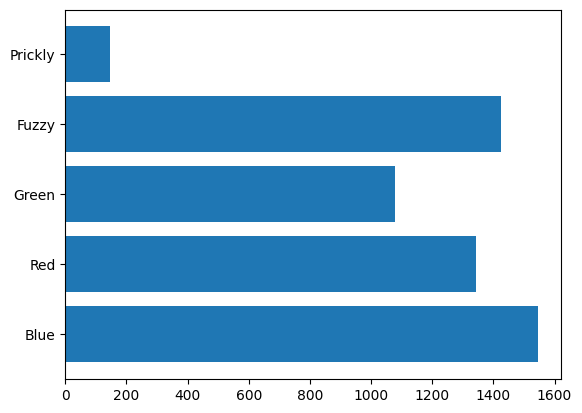

In [29]:
import numpy as np
from matplotlib import pyplot

# By now, you'll have a list of the *real* biome names
unique_biomes = ['Blue', 'Red', 'Green', 'Fuzzy', 'Prickly']

# If you calculated the average NPP by biome and stored it in npp_by_biome...for now, we'll use random values
npp_by_biome = np.random.randint(0, 2000, len(unique_biomes))

# A horizontal bar plot, assuming you have a list "unique_biomes" of the unique biome labels
pyplot.barh(unique_biomes, npp_by_biome)

### Amnswer 2.3

PANDAS VERSION

<BarContainer object of 10 artists>

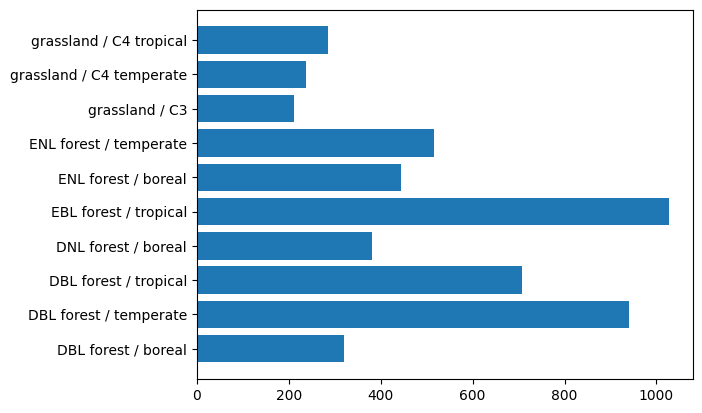

In [36]:
mean_npp_df = data.groupby('BIOMENEW')['TNPP_C'].mean().reset_index()

plt.barh(mean_npp_df['BIOMENEW'], mean_npp_df['TNPP_C'])

NUMPY VERSION

<BarContainer object of 10 artists>

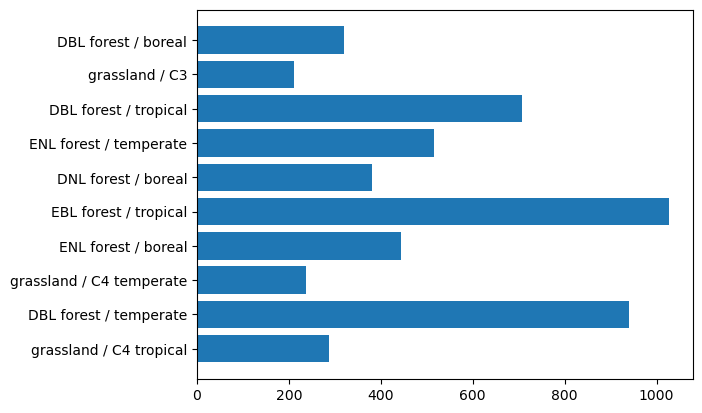

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data_np = data.to_numpy()

mean_npp = []

# Iterate over each unique biome
for biome in biome_names2:
    npp_values = data_np[data_np[:, 3] == biome][:, -1].astype(float)
    mean_value = npp_values.mean()
    mean_npp.append([biome, mean_value])

mean_npp = np.array(mean_npp)

# Plot the results
biomes = mean_npp[:, 0]
mean_values = mean_npp[:, 1].astype(float)  # Convert to float for plotting

# Create a horizontal bar plot
plt.barh(biomes, mean_values)

---

## Problem 2.4: Calculating Distances on a Sphere

Let's revisit the previous challenge in a different way. Can we calculate the distance between latitude and longitude pairs to determine if they are "close enough" to be considered the same point?

The Haversine function can be used to calculate *great circle distance* (shortest path on a sphere) between two points, but this is a complicated function so we'll just pretend the Earth is flat. For flat distances between two points that are close together, `(x1, y1)` and `(x2, y2)` (`x` and `y` refer to longitude and latitude, respectively), the Euclidean distance function is a good approximation:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**Write the Euclidean distance function as a Python function (your own function, using the `def` keyword) and use it to calculate the distance between the first two rows of the `data` table.**

In [10]:
data[0:2]

,SITE_ID,LAT_DD,LONG_DD,BIOMENEW,TNPP_C
0,4,-27.75,152.45,grassland / C4 tropical,264
1,5,-27.03,152.02,grassland / C4 tropical,175


**Hint:** You can calculate square roots one of two ways.

You could raise a number to the power `(1/2)`:

In [11]:
4 ** 0.5

2.0

Or, you could:

In [37]:
from math import sqrt
sqrt(4)

2.0

### Answer 2.4

In [38]:
def calc_dist(x1, x2, y1, y2):
    distance = sqrt(pow((x2 - x1), 2) + pow((y2 - y1), 2))
    return round(distance, 2)

In [41]:
first2 = data[0:2]

x1 = first2.iloc[0, 2]
x2 = first2.iloc[1, 2]
y1 = first2.iloc[0, 1]
y2 = first2.iloc[1, 1]

calc_dist(x1, x2, y1, y2)

0.84

---

## Challenge Yourself (Optional):

If you want to take these examples further, consider:

- Is there a relationship between mean annual temperature (`TEMP_ANN`) or mean annual precipitation (`PREC_ANN`) and total NPP?
- How many records of each biome type are in each country? That is, can you do a *cross-tabulation* of countries and biome types?

These are NOT eligible for extra credit, but feel free to include them in your submitted lab report.